**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [4]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
%load_ext pycodestyle_magic

C:\Users\iymax_000\Anaconda3\lib\site-packages\pycodestyle.py:113: FutureWarning: Possible nested set at position 1
  EXTRANEOUS_WHITESPACE_REGEX = re.compile(r'[[({] | []}),;:]')


In [5]:
#%%pycodestyle


class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin,
                             SupervisedIntegerMixin, ClassifierMixin):

    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm

    def fit(self, X, y):
        self.X_min_max = (np.min(X), np.max(X))
        self.X = (X-np.min(X))/(np.max(X)-np.min(X))
        self.X_squares = (self.X**2).sum(axis=1)
        self.y = np.array(y)
        self.classes = np.unique(y).astype(np.int32, copy=False)
        if self.algorithm == 'kd_tree':
            self.kd_tree = KDTree(self.X)

    def nearest_neighbors(self, X):
        X = (X-self.X_min_max[0])/(self.X_min_max[1]-self.X_min_max[0])
        if self.algorithm == 'kd_tree':
            _, nearest_indexes = self.kd_tree.query(
                np.array(X).astype(np.double, copy=False),
                k=self.n_neighbors)
        else:
            X_squares = (X**2).sum(axis=1)
        # KNeighborsClassifier using minkowski distance
        # with p=2=> Euclidean distance
            distances = np.sqrt(X_squares.reshape(-1, 1)
                                + self.X_squares - 2*np.dot(X, self.X.T))
            nearest_indexes = np.argsort(distances)[:, :self.n_neighbors]
        return self.y[nearest_indexes]

    def predict(self, X):
        n = self.nearest_neighbors(X).astype(np.int32, copy=False)
        count = np.apply_along_axis(
            lambda x: np.bincount(x).argmax().astype(np.int32, copy=False),
            1, n)
        return count

    def predict_proba(self, X):
        neighbors = self.nearest_neighbors(X)
        predictions = np.zeros((X.shape[0], self.classes.size))
        for _class in self.classes:
            predictions[:, _class] = np.sum(_class == neighbors, axis=1)
        predictions /= self.n_neighbors
        return predictions

    def score(self, X, y):
        return (self.predict(X) == y).mean()

**IRIS**

In [6]:
iris = datasets.load_iris()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [74]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [75]:
%time clf.fit(X_train, y_train)

Wall time: 3 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [76]:
%time my_clf.fit(X_train, y_train)

Wall time: 1e+03 µs


In [77]:
%time clf.predict(X_test)

Wall time: 6 ms


array([1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1])

In [78]:
%time my_clf.predict(X_test)

Wall time: 4 ms


array([1, 0, 1, 0, 1, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1])

In [79]:
%time clf.predict_proba(X_test)

Wall time: 1 ms


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [80]:
%time my_clf.predict_proba(X_test)

Wall time: 998 µs


array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [64]:
clf.score(X_test, y_test)

0.9333333333333333

In [65]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

C:\Users\iymax_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


Best score = 0.9722222222222231 with numbers of neighbors= 15


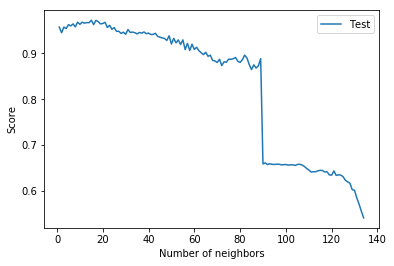

In [8]:
neighbors = range(1, X_train.shape[0])
neighbors_best = 0
score_test = np.array([])
max_number_of_test = 300
for n in neighbors:
    score = 0
    for test in range(1, max_number_of_test):
        X_train, X_test, y_train, y_test = train_test_split(
                iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        clf = KNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        score += my_clf.score(X_test, y_test)
    score_test = np.append(score_test, score/max_number_of_test)
neighbors_best = np.argmax(score_test)+1
print("Best score = {0} with numbers of neighbors= {1}".format(
    score_test[neighbors_best-1], neighbors_best))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.plot(neighbors, score_test, label="Test")
plt.legend()

**MNIST**

In [10]:
mnist = fetch_mldata('MNIST original')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [43]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [47]:
%time clf.fit(X_train, y_train)

Wall time: 53 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [44]:
%time my_clf.fit(X_train, y_train)

Wall time: 1.14 s


In [50]:
%time clf.predict(X_test)

Wall time: 1min 17s


array([1., 5., 2., 6., 5., 7., 0., 8., 0., 1., 0., 5., 7., 0., 1., 1., 4.,
       9., 7., 8., 1., 7., 5., 6., 5., 4., 4., 3., 0., 5., 6., 4., 0., 7.,
       8., 4., 7., 1., 4., 2., 5., 4., 5., 2., 6., 0., 1., 0., 5., 5., 5.,
       2., 3., 1., 4., 1., 6., 8., 1., 1., 1., 5., 2., 8., 1., 6., 4., 1.,
       1., 2., 4., 7., 9., 8., 6., 9., 2., 0., 5., 4., 3., 0., 9., 4., 0.,
       3., 8., 6., 5., 0., 0., 1., 3., 5., 1., 3., 7., 6., 1., 4., 7., 1.,
       5., 9., 2., 6., 1., 3., 1., 0., 0., 6., 1., 4., 5., 5., 7., 4., 3.,
       0., 1., 8., 2., 6., 7., 6., 9., 5., 6., 0., 6., 9., 1., 8., 8., 4.,
       9., 1., 4., 2., 6., 3., 6., 7., 8., 5., 8., 1., 4., 6., 7., 4., 1.,
       3., 0., 6., 0., 2., 2., 2., 4., 1., 8., 9., 0., 3., 8., 4., 1., 3.,
       3., 2., 2., 7., 7., 2., 3., 7., 3., 8., 7., 1., 3., 8., 8., 6., 4.,
       9., 0., 9., 2., 0., 9., 8., 2., 9., 6., 9., 6., 7., 3., 2., 7., 0.,
       6., 3., 1., 0., 3., 1., 4., 3., 2., 7., 5., 7., 9., 5., 8., 3., 1.,
       8., 2., 6., 4., 6.

In [51]:
%time my_clf.predict(X_test)

Wall time: 9.32 s


array([1, 5, 2, 6, 5, 7, 0, 8, 0, 1, 0, 5, 7, 0, 1, 1, 4, 9, 7, 8, 1, 7,
       5, 6, 5, 4, 4, 3, 0, 5, 6, 4, 0, 7, 8, 4, 7, 1, 4, 2, 5, 4, 5, 2,
       6, 0, 1, 0, 5, 5, 5, 2, 3, 1, 4, 1, 6, 8, 1, 1, 1, 5, 2, 8, 1, 6,
       4, 1, 1, 2, 4, 7, 9, 8, 6, 9, 2, 0, 5, 4, 3, 0, 9, 4, 0, 3, 8, 6,
       5, 0, 0, 1, 3, 5, 1, 3, 7, 6, 1, 4, 7, 1, 5, 9, 2, 6, 1, 3, 1, 0,
       0, 6, 1, 4, 5, 5, 7, 4, 3, 0, 1, 8, 2, 6, 7, 6, 9, 5, 6, 0, 6, 9,
       1, 8, 8, 4, 9, 1, 4, 2, 6, 3, 6, 7, 8, 5, 8, 1, 4, 6, 7, 4, 1, 3,
       0, 6, 0, 2, 2, 2, 4, 1, 8, 9, 0, 3, 8, 4, 1, 3, 3, 2, 2, 7, 7, 2,
       3, 7, 3, 8, 7, 1, 3, 8, 8, 6, 4, 9, 0, 9, 2, 0, 9, 8, 2, 9, 6, 9,
       6, 7, 3, 2, 7, 0, 6, 3, 1, 0, 3, 1, 4, 3, 2, 7, 5, 7, 9, 5, 8, 3,
       1, 8, 2, 6, 4, 6, 2, 7, 3, 2, 3, 1, 9, 7, 8, 3, 9, 6, 1, 5, 4, 4,
       7, 2, 0, 3, 4, 3, 5, 6, 7, 9, 5, 7, 9, 6, 9, 7, 9, 9, 4, 0, 9, 5,
       9, 4, 4, 2, 6, 8, 9, 5, 2, 5, 9, 7, 8, 2, 5, 0, 1, 6, 1, 1, 7, 7,
       6, 1, 1, 0, 0, 1, 8, 1, 3, 8, 5, 3, 3, 0, 4,

In [52]:
%time clf.predict_proba(X_test)

Wall time: 1min 8s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
%time my_clf.predict_proba(X_test)

Wall time: 7.84 s


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
clf.score(X_test, y_test)

0.9728571428571429

In [55]:
my_clf.score(X_test, y_test)

0.9728571428571429

Задание 4

In [9]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [11]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [99]:
%time clf.fit(X_train, y_train)

Wall time: 53.6 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [12]:
%time my_clf.fit(X_train, y_train)

Wall time: 54.1 s


In [101]:
%time clf.predict(X_test)

Wall time: 1min 8s


array([6., 5., 6., 6., 8., 5., 4., 0., 6., 7., 4., 8., 3., 5., 0., 4., 1.,
       8., 1., 6., 4., 8., 5., 7., 4., 5., 9., 5., 8., 7., 7., 2., 9., 0.,
       0., 9., 5., 6., 9., 7., 9., 7., 6., 1., 2., 8., 6., 9., 0., 1., 0.,
       6., 3., 5., 8., 0., 3., 3., 8., 4., 8., 1., 6., 9., 9., 7., 1., 4.,
       4., 6., 9., 0., 7., 4., 9., 6., 5., 4., 6., 0., 3., 3., 1., 9., 9.,
       7., 5., 3., 4., 6., 4., 0., 1., 5., 3., 3., 8., 5., 4., 8., 0., 2.,
       3., 3., 1., 7., 5., 1., 7., 1., 4., 4., 1., 6., 2., 6., 1., 6., 2.,
       3., 0., 2., 7., 9., 1., 6., 6., 1., 7., 6., 1., 9., 5., 6., 7., 0.,
       0., 2., 0., 1., 9., 7., 1., 2., 1., 3., 5., 0., 9., 8., 9., 8., 8.,
       5., 5., 6., 7., 2., 1., 1., 2., 2., 4., 1., 1., 8., 7., 9., 9., 3.,
       1., 0., 7., 4., 3., 1., 0., 4., 1., 3., 3., 8., 2., 7., 0., 2., 7.,
       6., 3., 7., 6., 7., 2., 6., 4., 6., 2., 1., 2., 9., 2., 8., 0., 9.,
       8., 3., 1., 5., 0., 0., 7., 6., 8., 3., 7., 2., 1., 3., 3., 8., 3.,
       1., 1., 6., 2., 3.

In [102]:
%time my_clf.predict(X_test)

Wall time: 54.9 s


array([6, 5, 6, 6, 8, 5, 4, 0, 6, 7, 4, 8, 3, 5, 0, 4, 1, 8, 1, 6, 4, 8,
       5, 7, 4, 5, 9, 5, 8, 7, 7, 2, 9, 0, 0, 9, 5, 6, 9, 7, 9, 7, 6, 1,
       2, 8, 6, 9, 0, 1, 0, 6, 3, 5, 8, 0, 3, 3, 8, 4, 8, 1, 6, 9, 9, 7,
       1, 4, 4, 6, 9, 0, 7, 4, 9, 6, 5, 4, 6, 0, 3, 3, 1, 9, 9, 7, 5, 3,
       4, 6, 4, 0, 1, 5, 3, 3, 8, 5, 4, 8, 0, 2, 3, 3, 1, 7, 5, 1, 7, 1,
       4, 4, 1, 6, 2, 6, 1, 6, 2, 3, 0, 2, 7, 9, 1, 6, 6, 1, 7, 6, 1, 9,
       5, 6, 7, 0, 0, 2, 0, 1, 9, 7, 1, 2, 1, 3, 5, 0, 9, 8, 9, 8, 8, 5,
       5, 6, 7, 2, 1, 1, 2, 2, 4, 1, 1, 8, 7, 9, 9, 3, 1, 0, 7, 4, 3, 1,
       0, 4, 1, 3, 3, 8, 2, 7, 0, 2, 7, 6, 3, 7, 6, 7, 2, 6, 4, 6, 2, 1,
       2, 9, 2, 8, 0, 9, 8, 3, 1, 5, 0, 0, 7, 6, 8, 3, 7, 2, 1, 3, 3, 8,
       3, 1, 1, 6, 2, 3, 2, 1, 9, 7, 4, 9, 0, 0, 4, 3, 1, 5, 0, 7, 7, 5,
       5, 2, 7, 6, 5, 5, 3, 0, 0, 5, 5, 5, 4, 3, 5, 2, 2, 7, 1, 6, 1, 3,
       7, 1, 2, 4, 7, 4, 3, 1, 8, 0, 4, 1, 8, 1, 4, 2, 4, 2, 3, 1, 1, 2,
       9, 2, 7, 5, 5, 0, 8, 8, 9, 1, 6, 9, 4, 8, 4,

In [103]:
%time clf.predict_proba(X_test)

Wall time: 1min 9s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [104]:
%time my_clf.predict_proba(X_test)

Wall time: 54.4 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
clf.score(X_test, y_test)

0.9714285714285714

In [106]:
my_clf.score(X_test, y_test)

0.9714285714285714

Задание 5

In [ ]:
# seaborn - библиотека, основанная на matplotlib, упрщающая визализацию данных
# matplotlib - библиотека для визуализации данных
# train_test_split - функция для разделения данных на тестовую и обучающую выборки
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - позволяет последовательно 
#трансформировать данные 
# StandardScaler (from sklearn.preprocessing import StandardScaler) - функция, приводящая данные к виду:
# среднее = 0, дисперсия =1
# ClassifierMixin -  в библиотеке sklearn является базовый классом для всех классификаторов.
# NeighborsBase - в библиотеке sklearn является базовым классом для всех алгоритмов "ближайших соседей",
# содержит базовую функциональность метода fit
# KNeighborsMixin - является базовым классом для алгоритма kNN, в нем определены методы для поиска 
#ближайших соседей
# SupervisedIntegerMixin - в библиотеке sklearn является базовым классом для kNN классификатора,
# содержит метод fit